In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
df_train = pd.read_csv('data/data_train.csv')
df_train = df_train.set_index('Id')
df_train


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
Id,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,24,1,0,0,1,0,1,...,0,0,0,0,8,4,5,60,0,0
1,0,0,1,28,0,0,0,1,1,1,...,1,0,0,0,2,6,8,0,-64,0
2,0,0,1,36,1,0,0,1,1,0,...,30,30,1,0,3,2,1,-46,0,0
3,0,1,1,35,0,0,0,1,1,1,...,0,0,0,0,8,6,8,-83,-188,0
4,0,1,1,27,0,0,0,1,0,1,...,0,0,0,0,9,5,4,-58,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202939,0,0,1,29,0,0,0,1,0,1,...,10,2,0,0,8,6,7,-66,4,0
202940,0,0,1,23,0,0,0,1,0,0,...,0,0,0,0,11,5,7,0,-84,0
202941,1,1,1,38,0,0,0,1,1,1,...,0,2,0,1,10,6,6,-57,-16,0


In [4]:
df_test = pd.read_csv('data/data_test.csv')
df_test = df_test.set_index('Id')
df_test

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
Id,,,,,,,,,,,,,,,,,,,,,
202944,1,1,1,30,1,0,1,1,1,1,...,3,0,0,1,11,4,7,0,-145,NaN
202945,0,0,1,27,1,0,0,0,0,1,...,0,30,1,1,13,2,5,28,-145,NaN
202946,0,0,1,21,0,0,0,1,1,1,...,0,5,0,0,10,6,8,-26,72,NaN
202947,0,0,1,24,1,0,0,1,1,1,...,0,30,0,0,9,6,7,0,0,NaN
202948,1,0,1,34,0,0,0,1,1,0,...,0,1,1,0,11,4,7,-73,-63,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,0,1,38,0,0,0,1,1,0,...,2,2,0,0,8,6,7,43,22,NaN
253676,0,1,1,24,0,0,0,1,0,1,...,25,0,0,0,10,6,7,-6,-67,NaN
253677,1,1,1,31,0,0,1,1,1,1,...,0,0,1,0,13,5,3,34,100,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 65968 entries, 0 to 202941
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                65968 non-null  float64
 1   HighChol              65968 non-null  float64
 2   CholCheck             65968 non-null  float64
 3   BMI                   65968 non-null  float64
 4   Smoker                65968 non-null  float64
 5   Stroke                65968 non-null  float64
 6   HeartDiseaseorAttack  65968 non-null  float64
 7   PhysActivity          65968 non-null  float64
 8   Fruits                65968 non-null  float64
 9   Veggies               65968 non-null  float64
 10  HvyAlcoholConsump     65968 non-null  float64
 11  AnyHealthcare         65968 non-null  float64
 12  NoDocbcCost           65968 non-null  float64
 13  GenHlth               65968 non-null  float64
 14  MentHlth              65968 non-null  float64
 15  PhysHlth              6

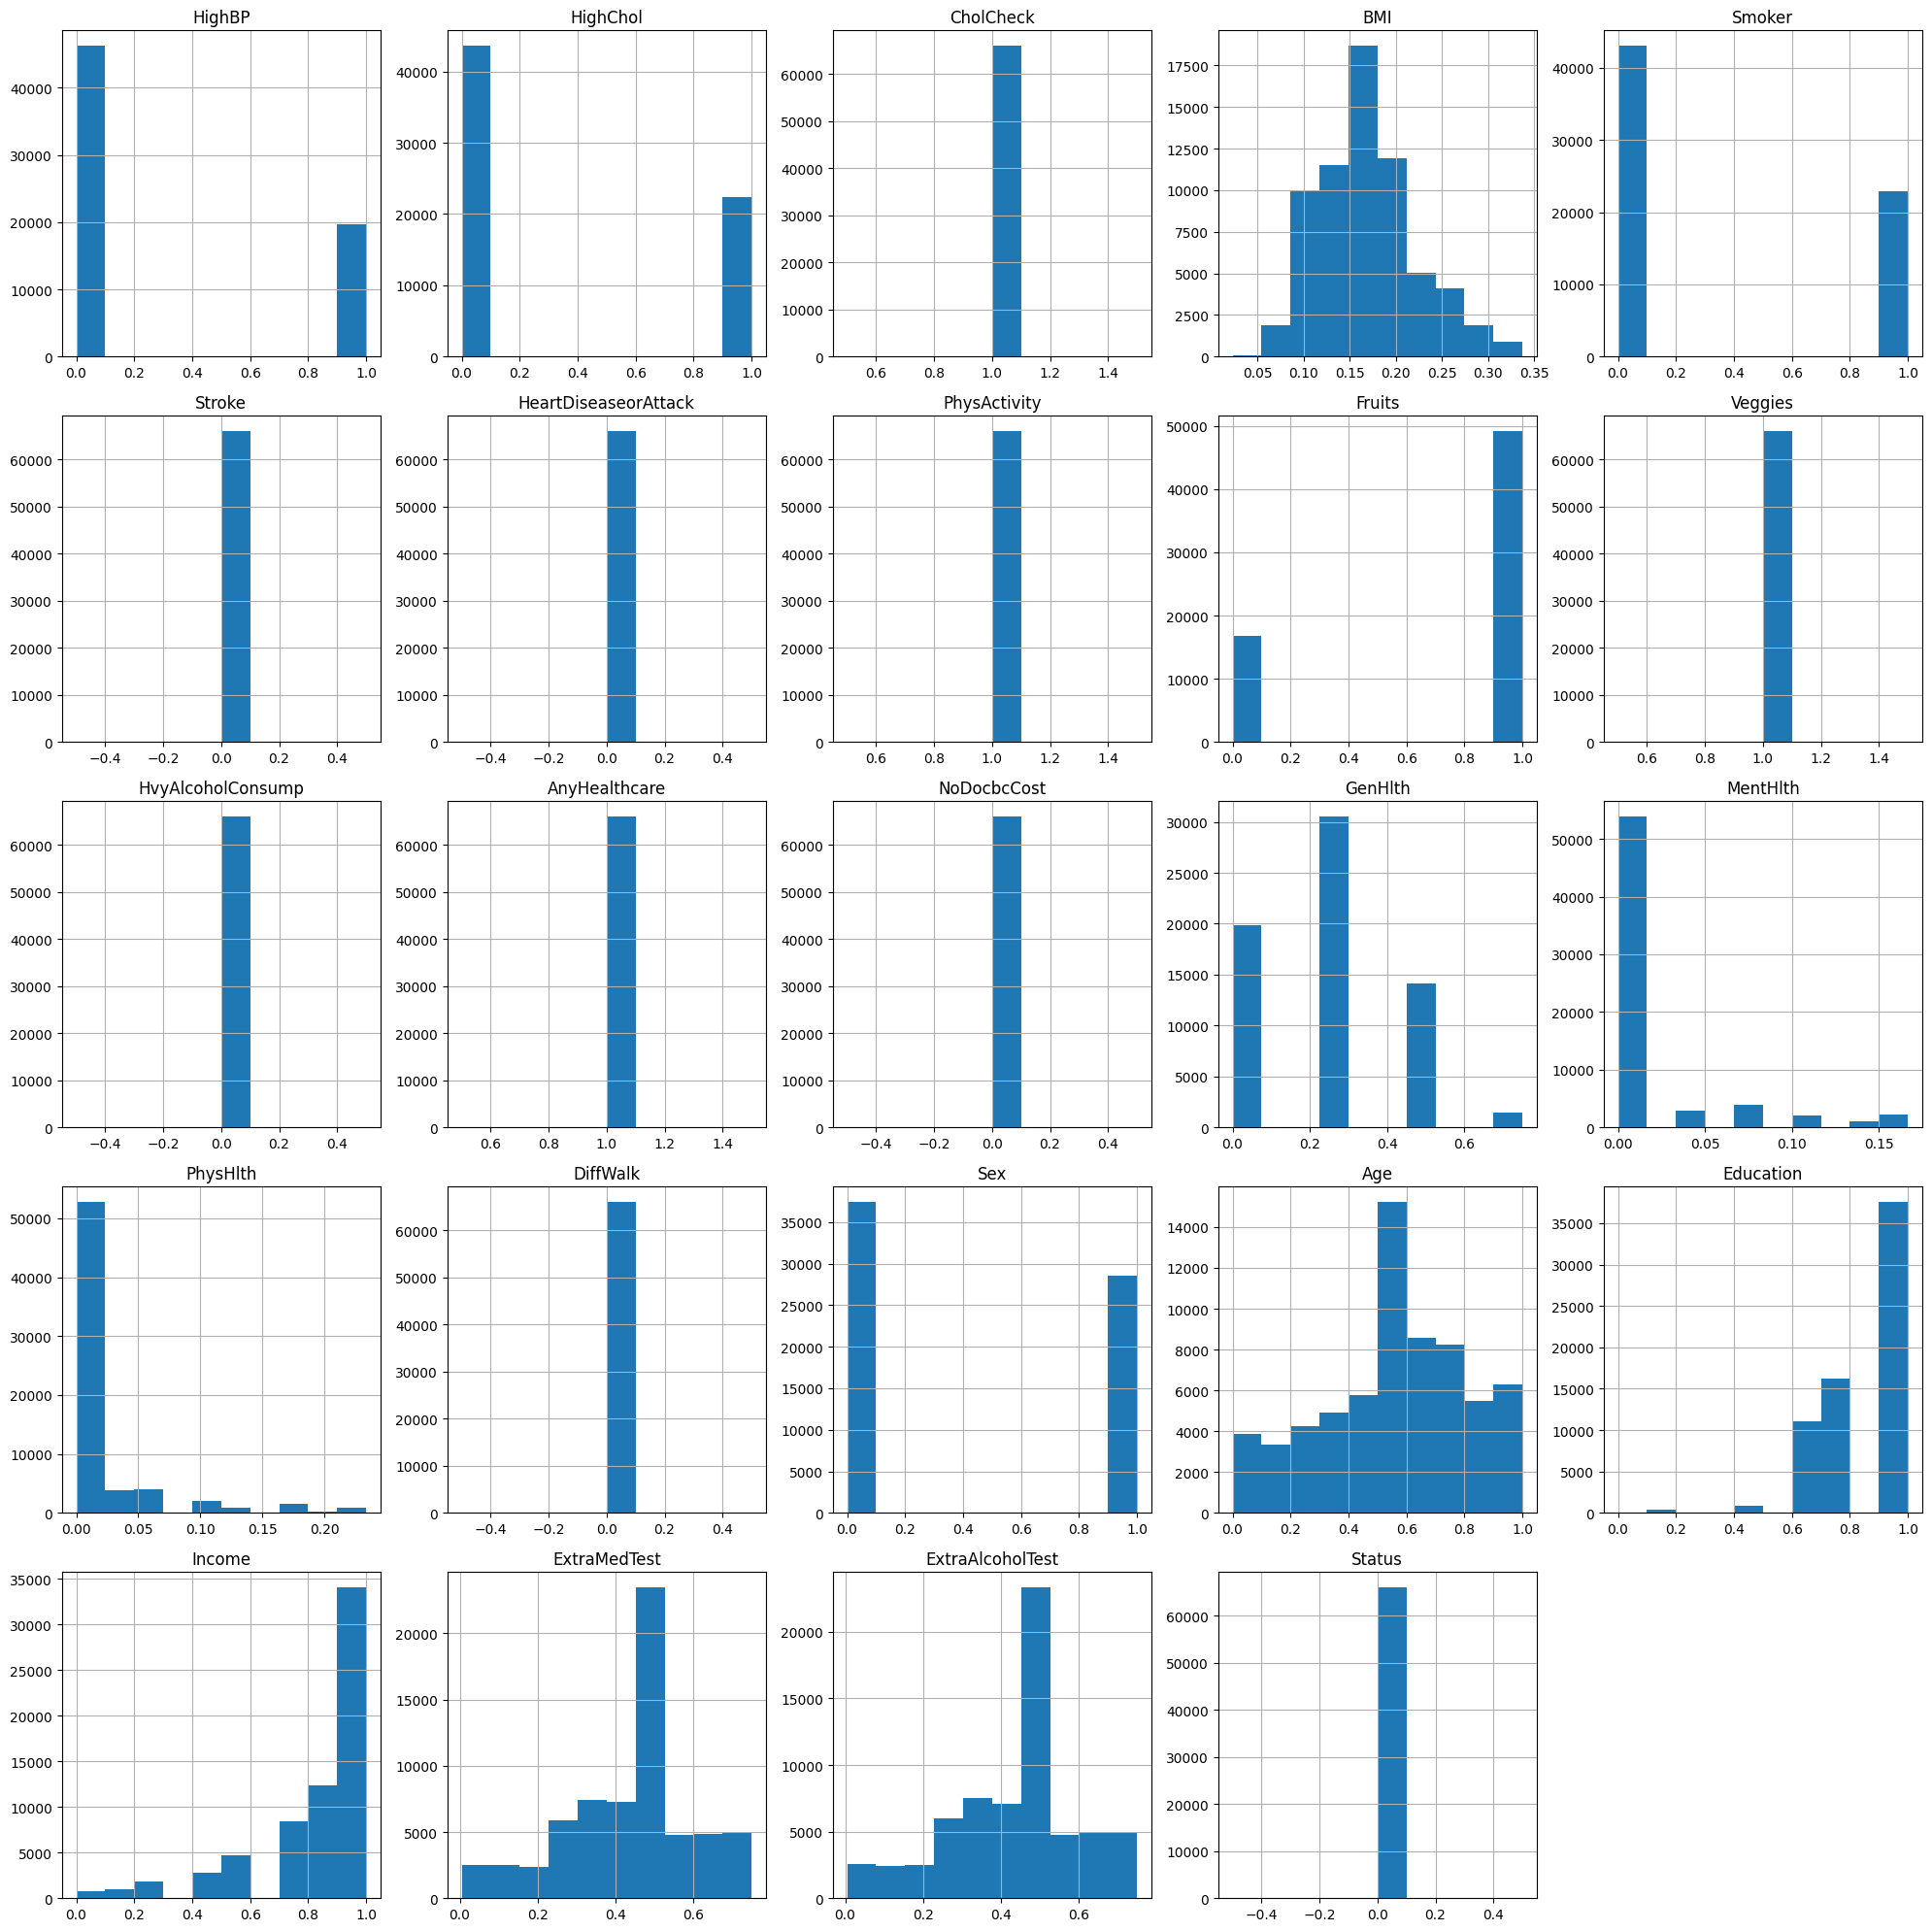

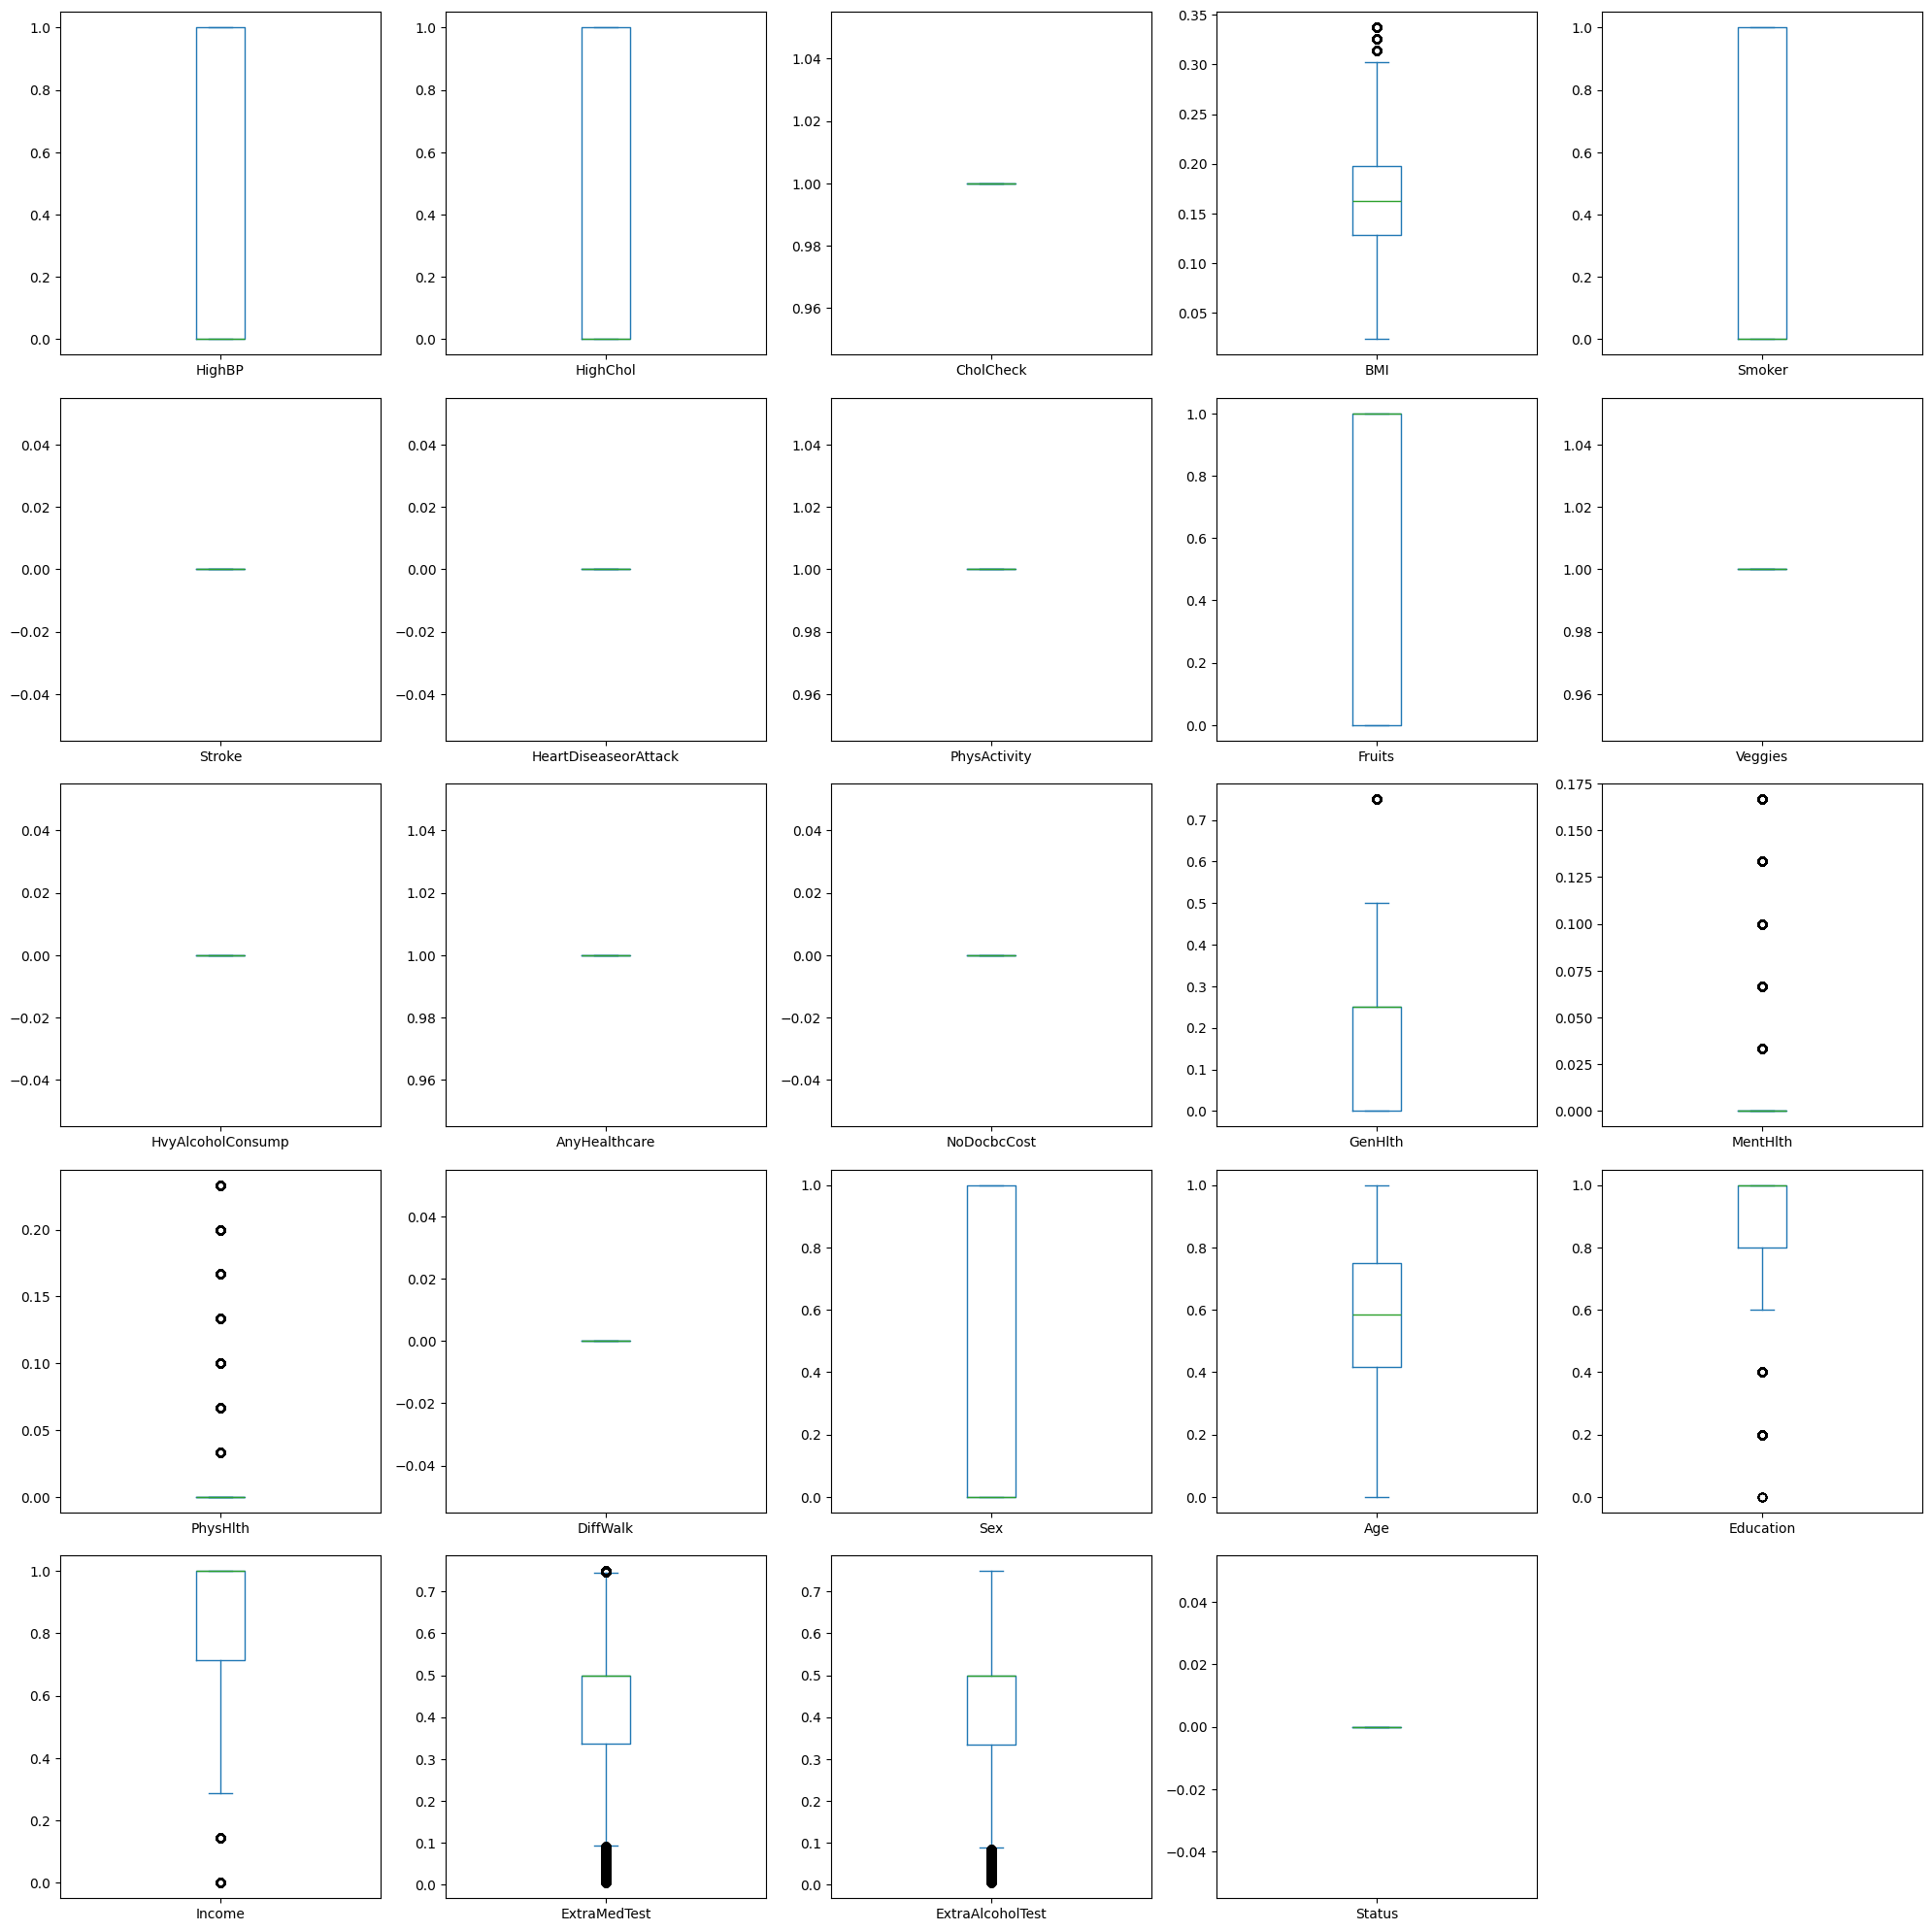

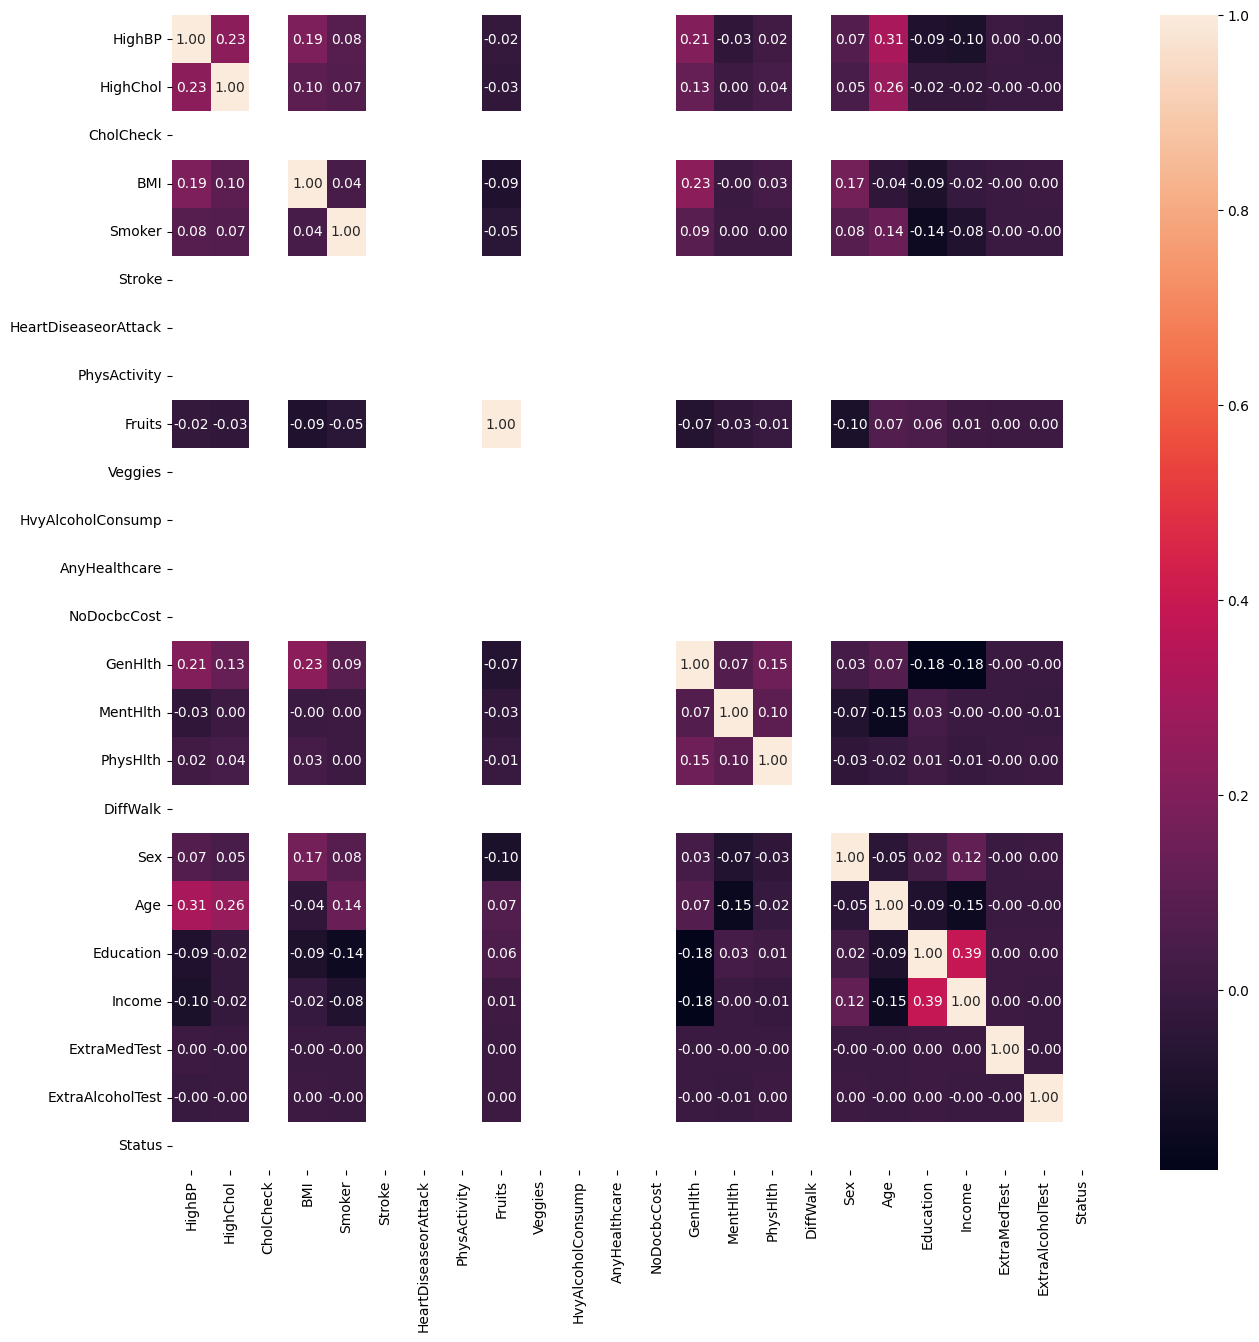

In [10]:
# Check basic information
df_train.info()

# Generate descriptive statistics
df_train.describe()





In [ ]:
# Plot histograms for each column
df_train.hist(figsize=(20,20))
plt.tight_layout()
plt.show()

# Plot boxplots for each column
df_train.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(20,20))
plt.tight_layout()
plt.show()

# Plot correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(), annot=True, fmt=".2f")
plt.show()

In [6]:

# Apply MinMaxScaler
scaler = MinMaxScaler()
df_train_scaled = scaler.fit_transform(df_train)

# Convert numpy array back to DataFrame
df_train = pd.DataFrame(df_train_scaled, columns=df_train.columns, index=df_train.index)
df_train

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
Id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,1.0,0.139535,1.0,0.0,0.0,1.0,0.0,1.0,...,0.000000,0.000000,0.0,0.0,0.583333,0.6,0.571429,0.650754,0.500000,0.0
1,0.0,0.0,1.0,0.186047,0.0,0.0,0.0,1.0,1.0,1.0,...,0.033333,0.000000,0.0,0.0,0.083333,1.0,1.000000,0.500000,0.339196,0.0
2,0.0,0.0,1.0,0.279070,1.0,0.0,0.0,1.0,1.0,0.0,...,1.000000,1.000000,1.0,0.0,0.166667,0.2,0.000000,0.384422,0.500000,0.0
3,0.0,1.0,1.0,0.267442,0.0,0.0,0.0,1.0,1.0,1.0,...,0.000000,0.000000,0.0,0.0,0.583333,1.0,1.000000,0.291457,0.027638,0.0
4,0.0,1.0,1.0,0.174419,0.0,0.0,0.0,1.0,0.0,1.0,...,0.000000,0.000000,0.0,0.0,0.666667,0.8,0.428571,0.354271,0.500000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202939,0.0,0.0,1.0,0.197674,0.0,0.0,0.0,1.0,0.0,1.0,...,0.333333,0.066667,0.0,0.0,0.583333,1.0,0.857143,0.334171,0.510050,0.0
202940,0.0,0.0,1.0,0.127907,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.833333,0.8,0.857143,0.500000,0.288945,0.0
202941,1.0,1.0,1.0,0.302326,0.0,0.0,0.0,1.0,1.0,1.0,...,0.000000,0.066667,0.0,1.0,0.750000,1.0,0.714286,0.356784,0.459799,0.0


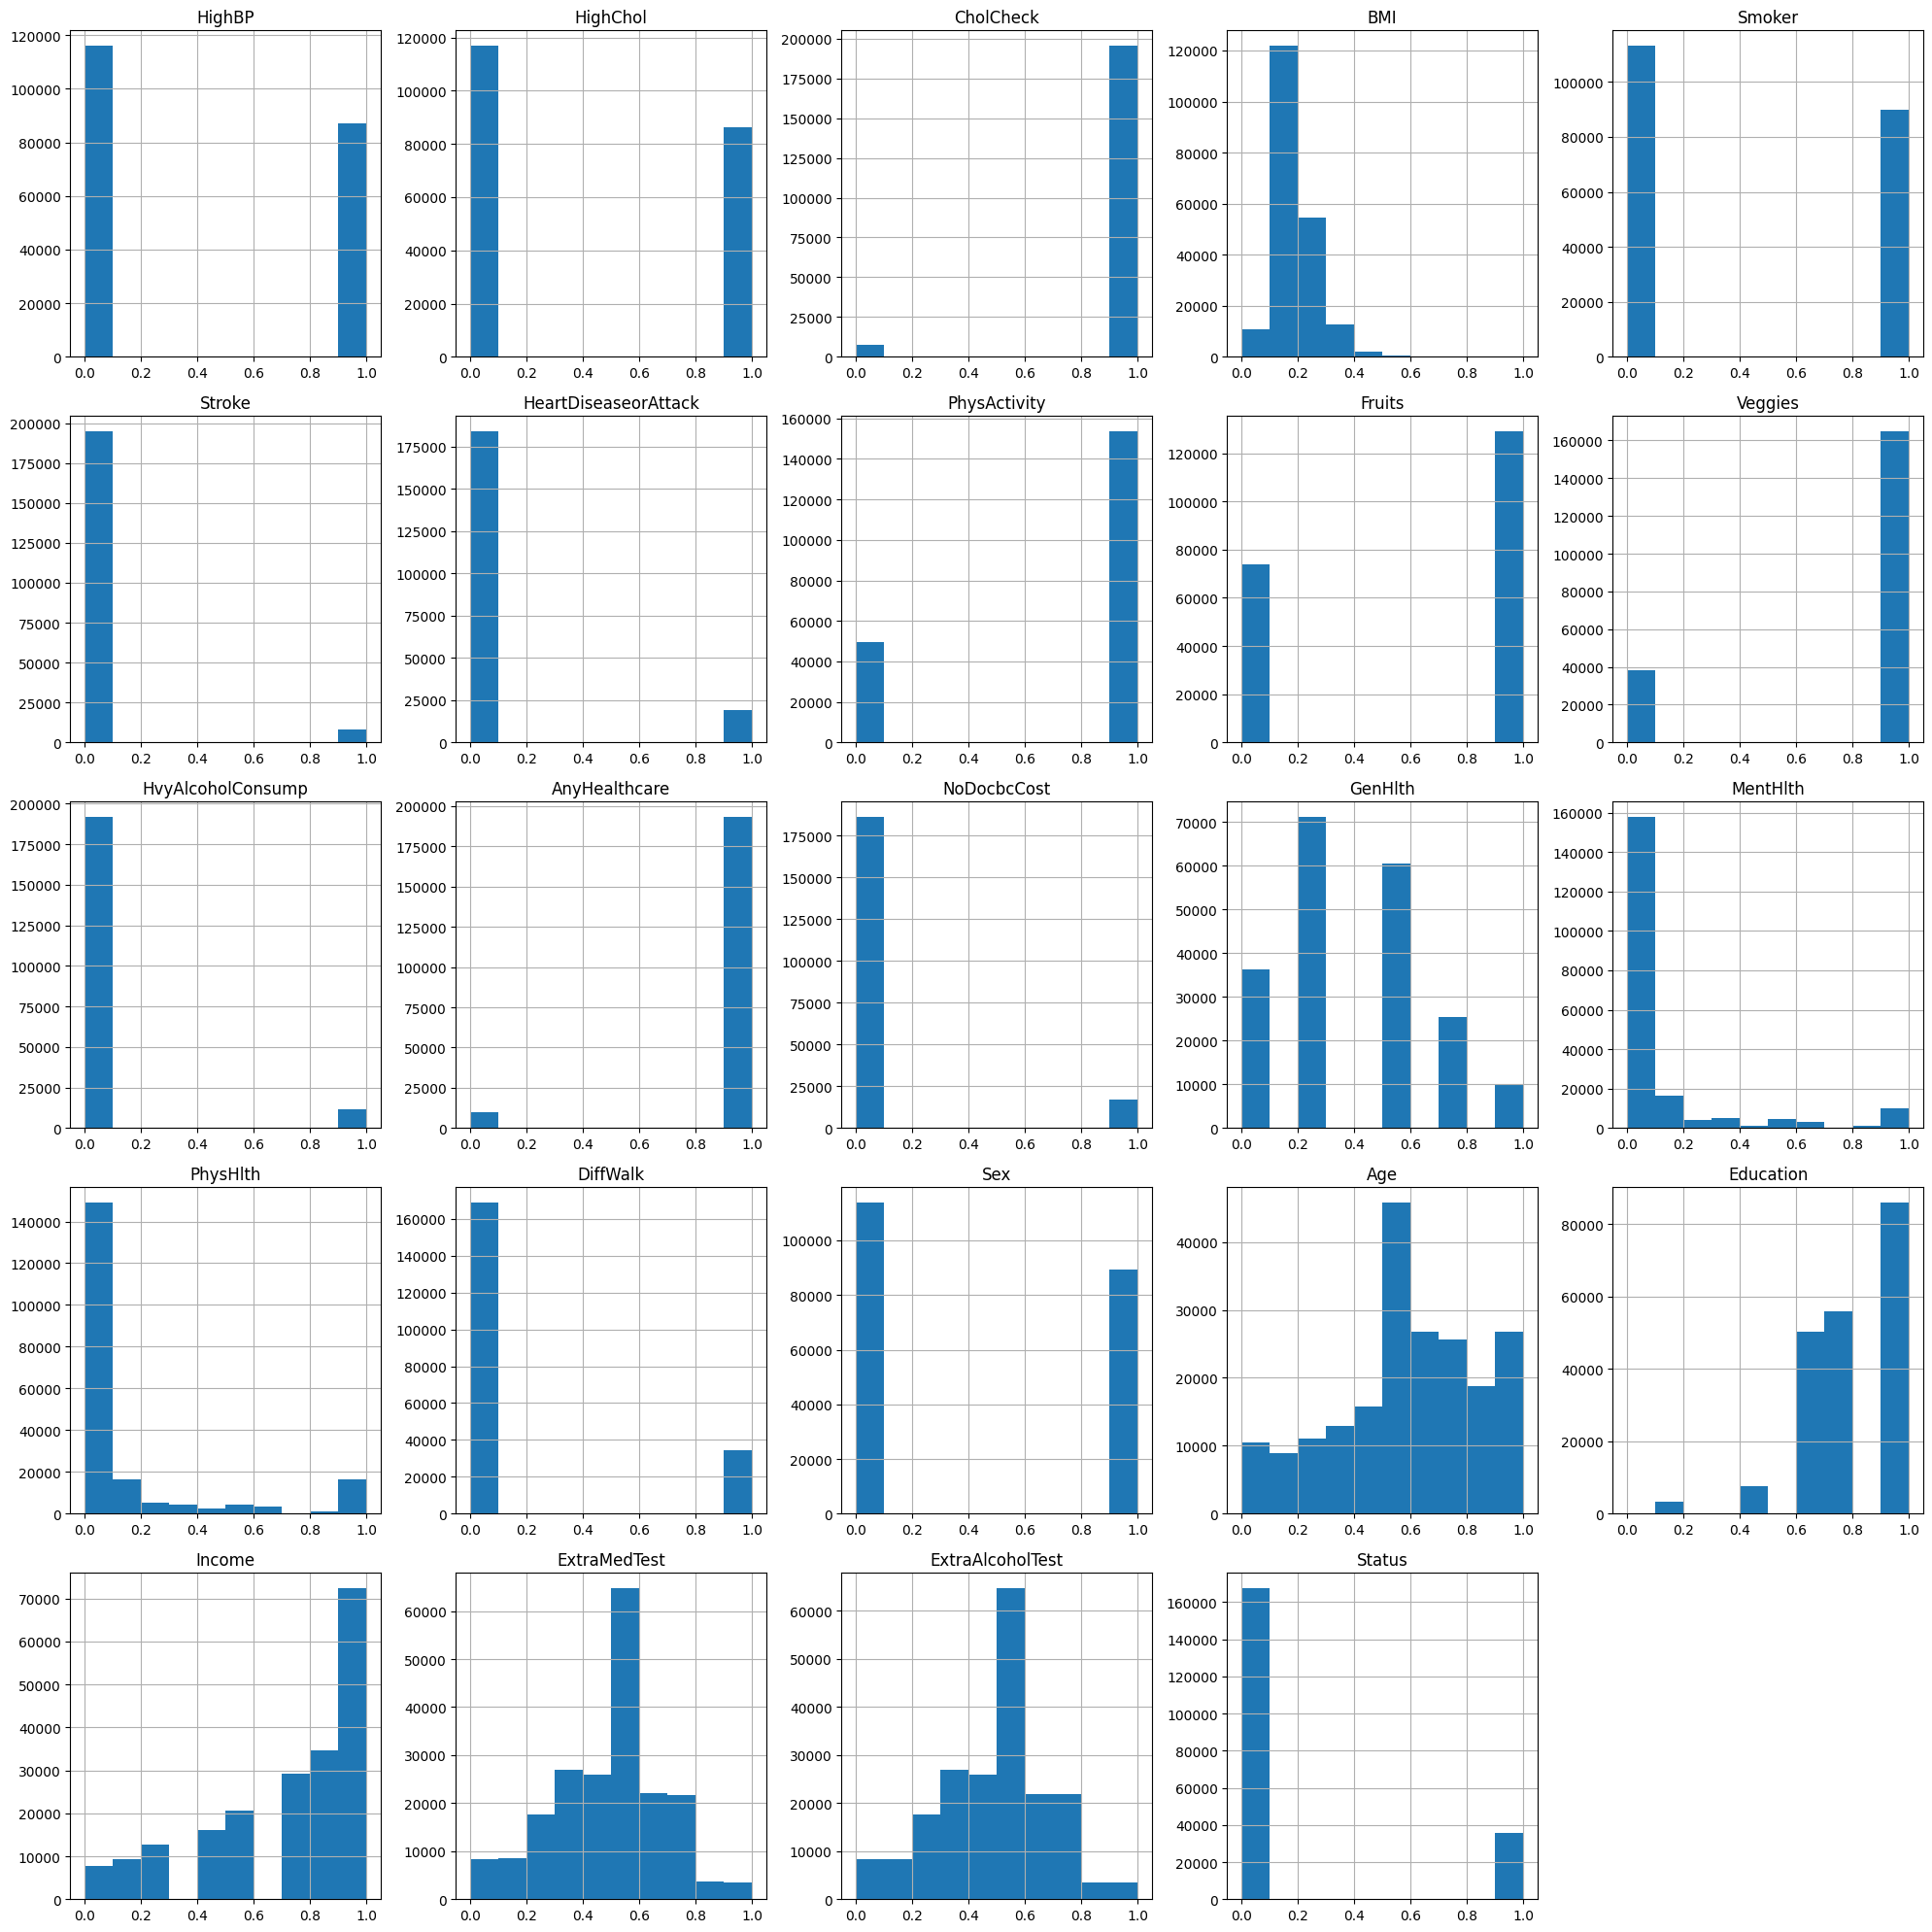

In [7]:
df_train.hist(figsize=(20,20))
plt.tight_layout()
plt.show()



In [8]:
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1

df_train = df_train[~((df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))).any(axis=1)]
df_train


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
Id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,1.0,0.139535,1.0,0.0,0.0,1.0,0.0,1.0,...,0.000000,0.000000,0.0,0.0,0.583333,0.6,0.571429,0.650754,0.500000,0.0
1,0.0,0.0,1.0,0.186047,0.0,0.0,0.0,1.0,1.0,1.0,...,0.033333,0.000000,0.0,0.0,0.083333,1.0,1.000000,0.500000,0.339196,0.0
3,0.0,1.0,1.0,0.267442,0.0,0.0,0.0,1.0,1.0,1.0,...,0.000000,0.000000,0.0,0.0,0.583333,1.0,1.000000,0.291457,0.027638,0.0
4,0.0,1.0,1.0,0.174419,0.0,0.0,0.0,1.0,0.0,1.0,...,0.000000,0.000000,0.0,0.0,0.666667,0.8,0.428571,0.354271,0.500000,0.0
7,0.0,0.0,1.0,0.186047,0.0,0.0,0.0,1.0,1.0,1.0,...,0.066667,0.166667,0.0,0.0,0.416667,1.0,1.000000,0.346734,0.253769,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202933,0.0,1.0,1.0,0.127907,1.0,0.0,0.0,1.0,1.0,1.0,...,0.000000,0.000000,0.0,0.0,0.583333,1.0,0.857143,0.610553,0.301508,0.0
202935,1.0,0.0,1.0,0.267442,0.0,0.0,0.0,1.0,1.0,1.0,...,0.000000,0.000000,0.0,0.0,1.000000,0.6,0.142857,0.605528,0.500000,0.0
202936,0.0,1.0,1.0,0.127907,0.0,0.0,0.0,1.0,1.0,1.0,...,0.000000,0.000000,0.0,0.0,0.583333,1.0,1.000000,0.500000,0.427136,0.0


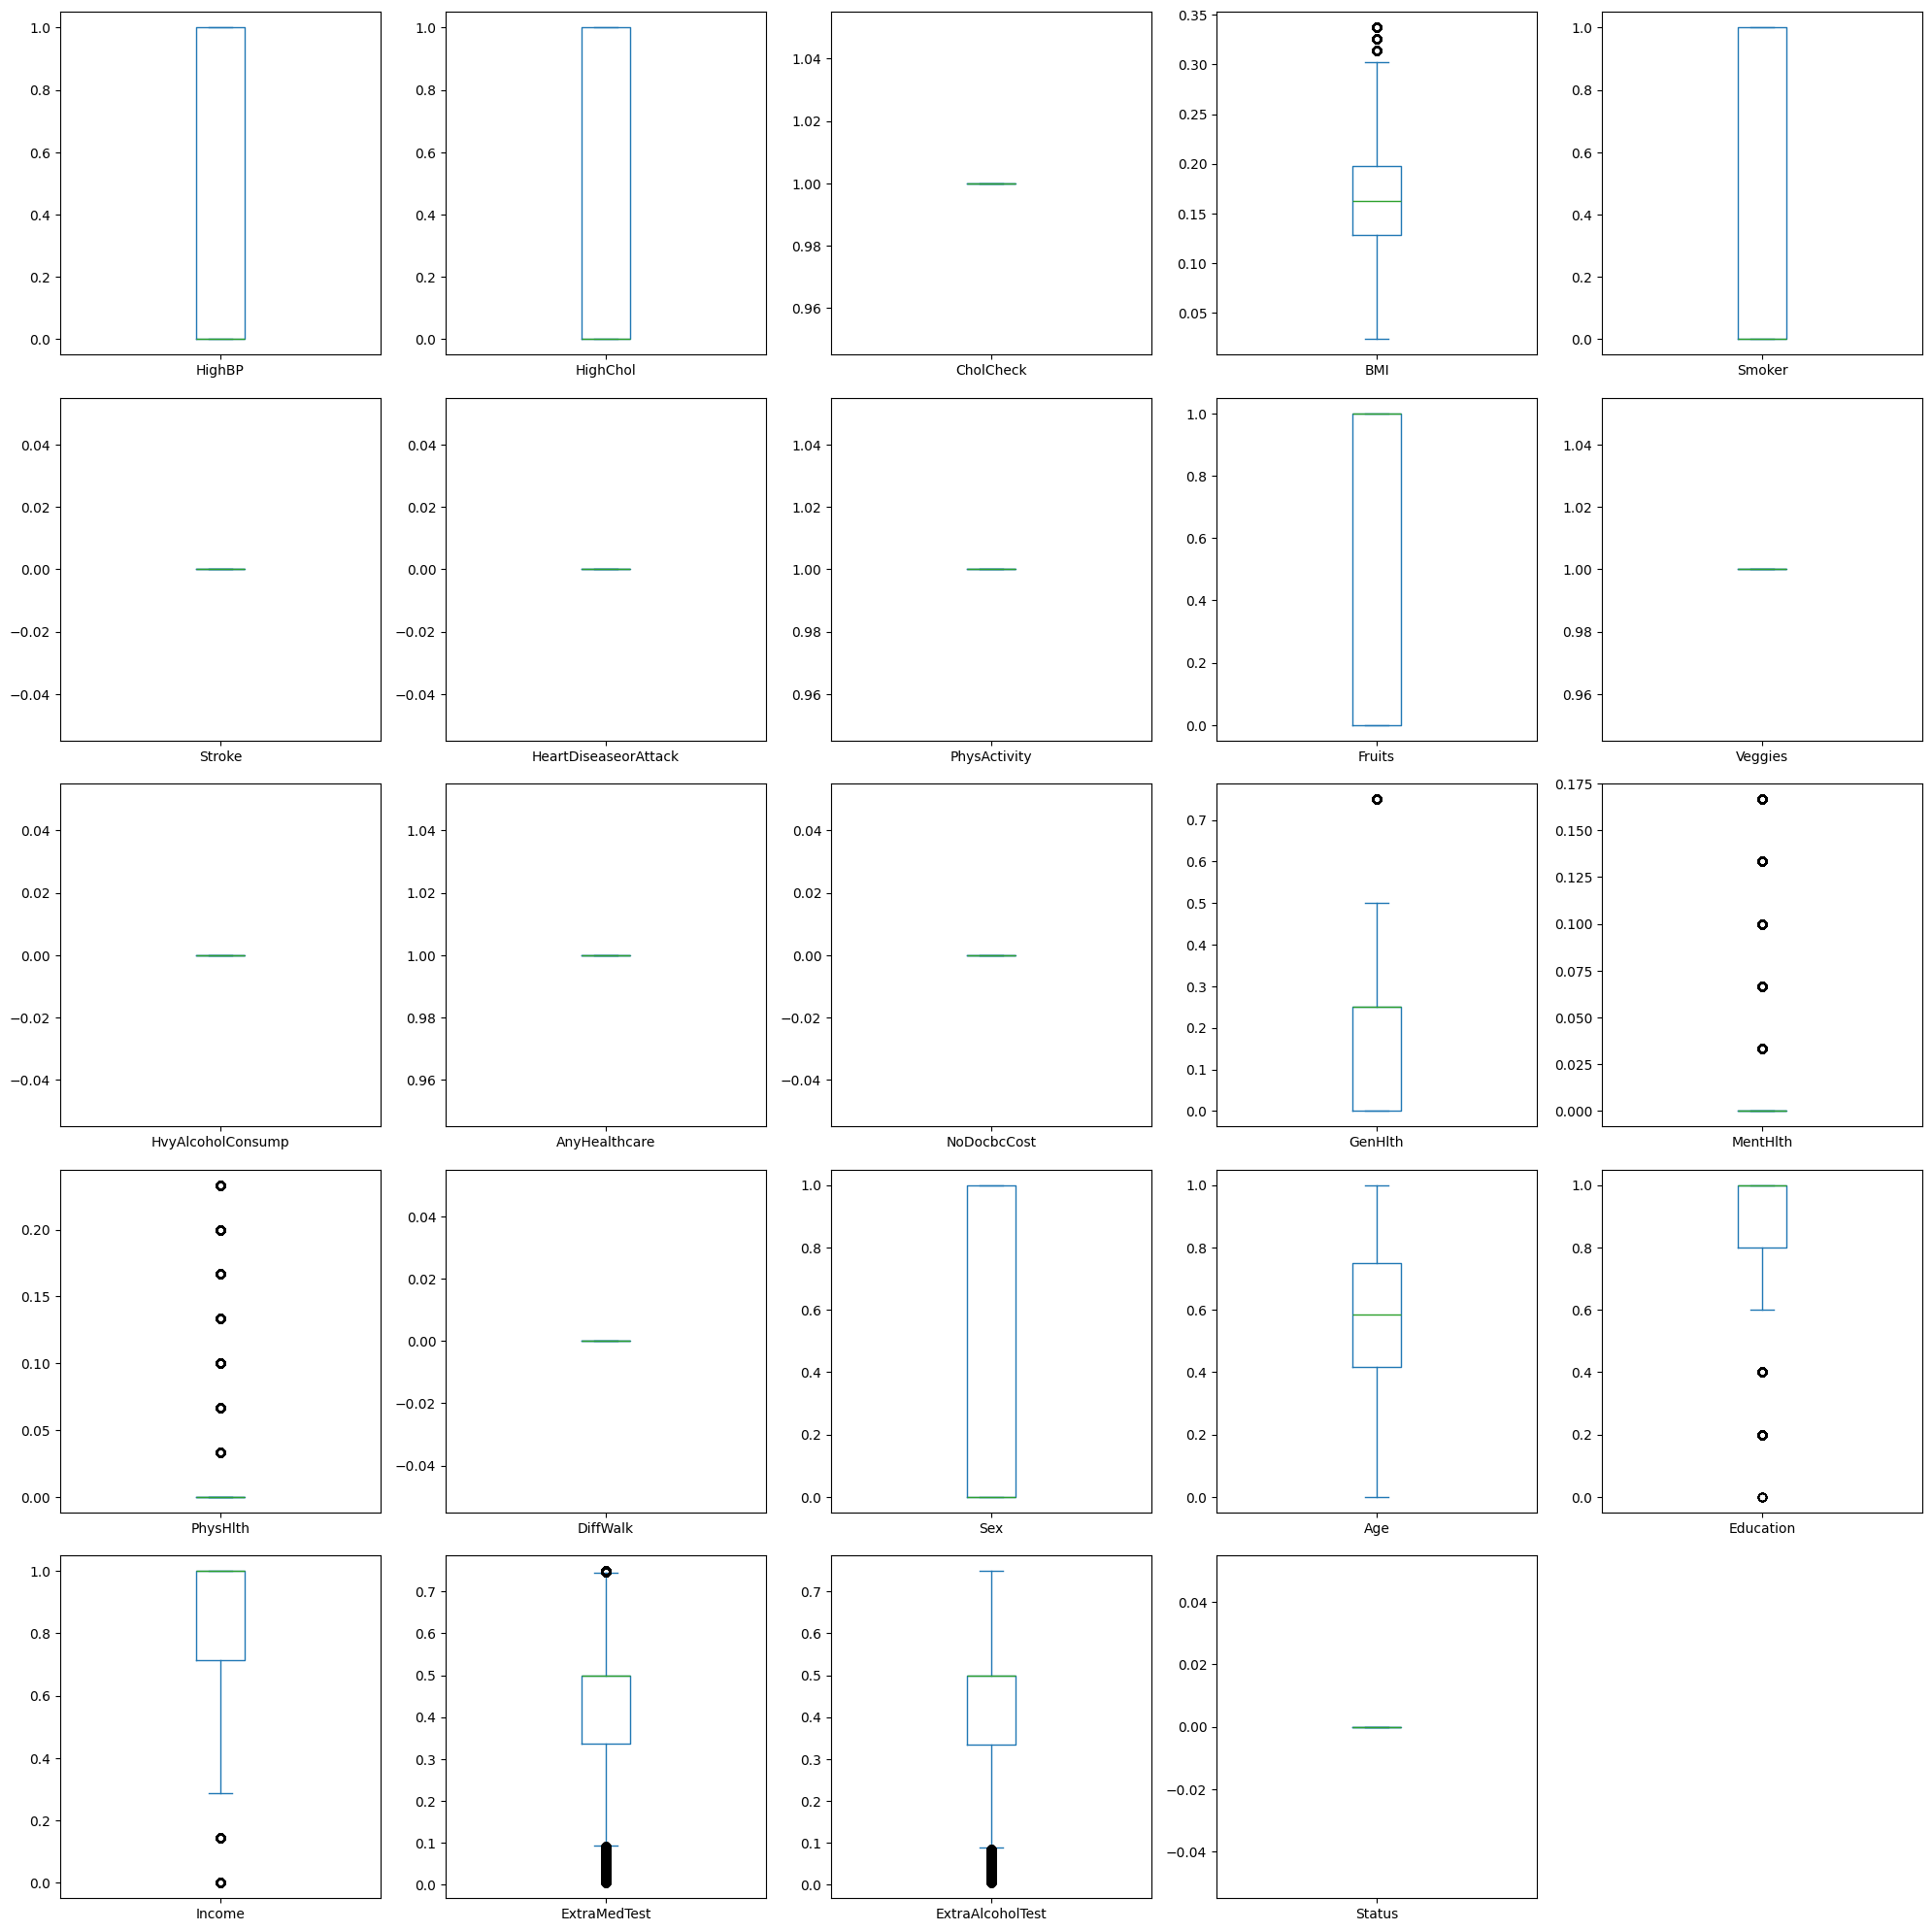

In [9]:
df_train.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize=(20,20))
plt.tight_layout()
plt.show()